## Install and import Libraries

In [2]:
# Pip install method (recommended)
import os
HOME = os.getcwd()
print(HOME)
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`. Let's install thw version and setting the API. 

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="VfTA8SRy2O9q3CmM9bc6")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Carpark-and-License-Plate-with-Illegal-parking-1 in yolov8:: 100%|██████████| 2508/2508 [00:00<00:00, 4575.40it/s]


## Custom Training

In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 471MB/s]
New https://pypi.org/project/ultralytics/8.2.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719245153.f2640eda54e1.1327.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1035.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1036.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1037.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


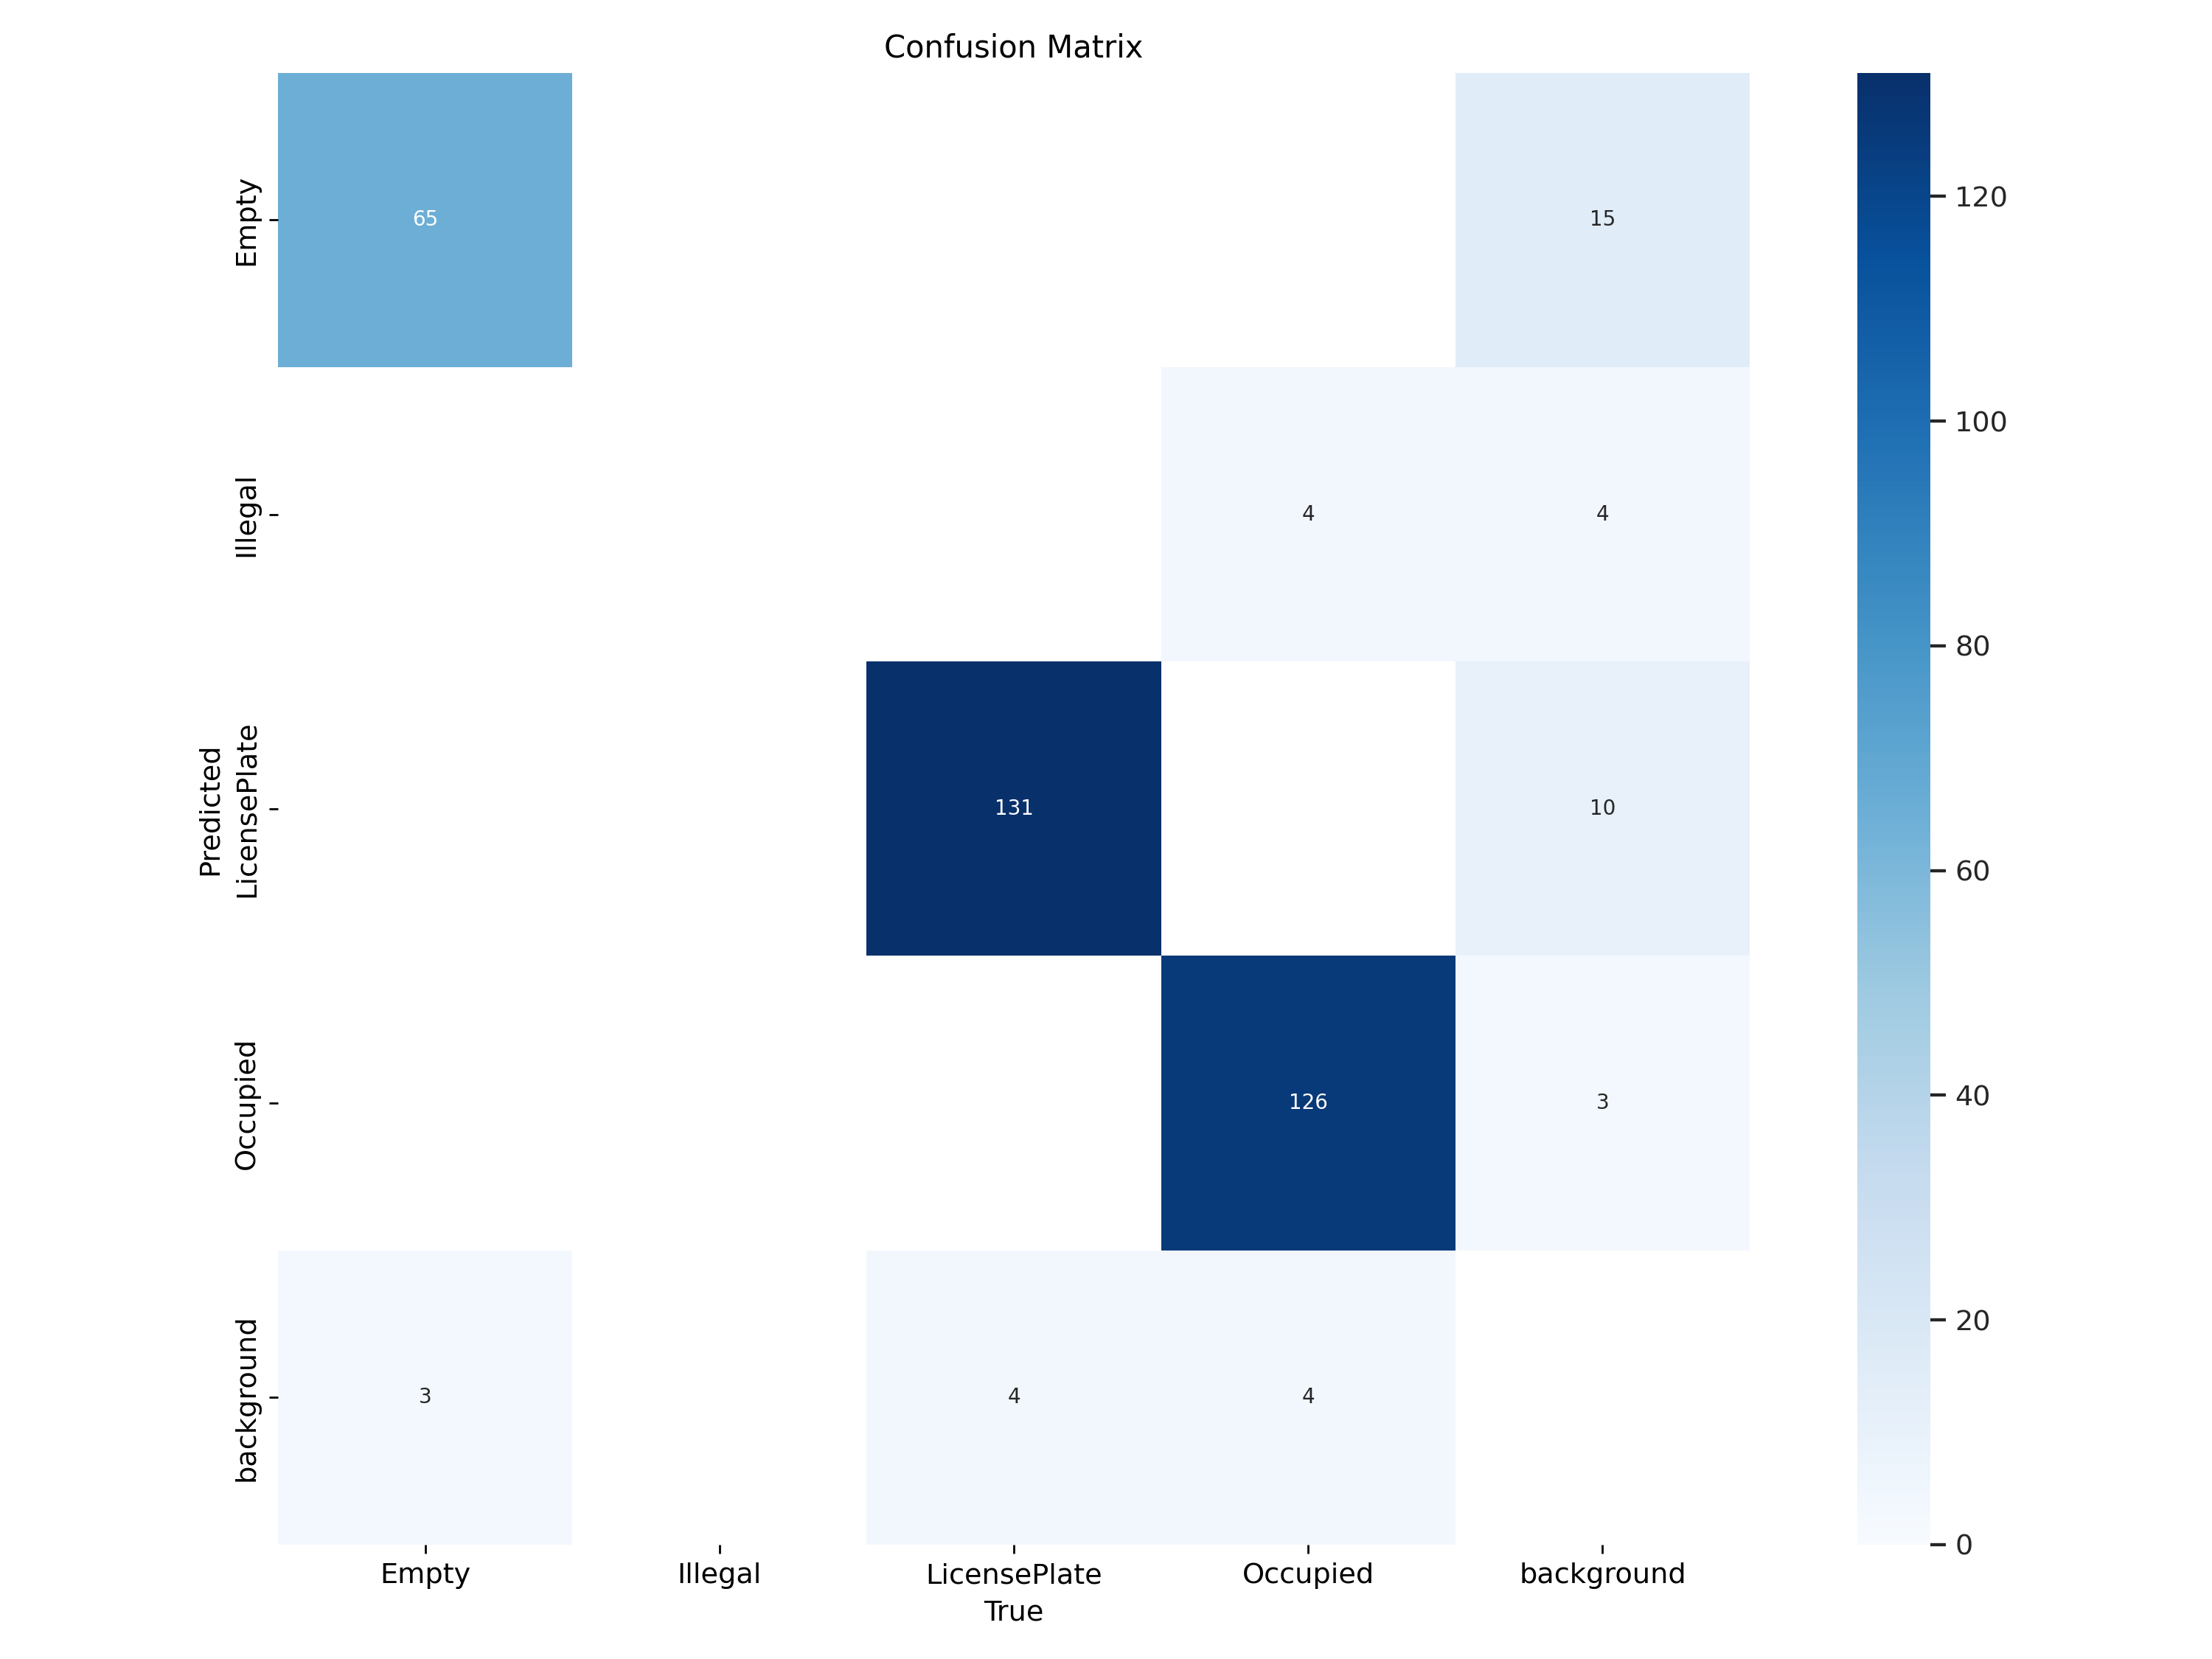

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


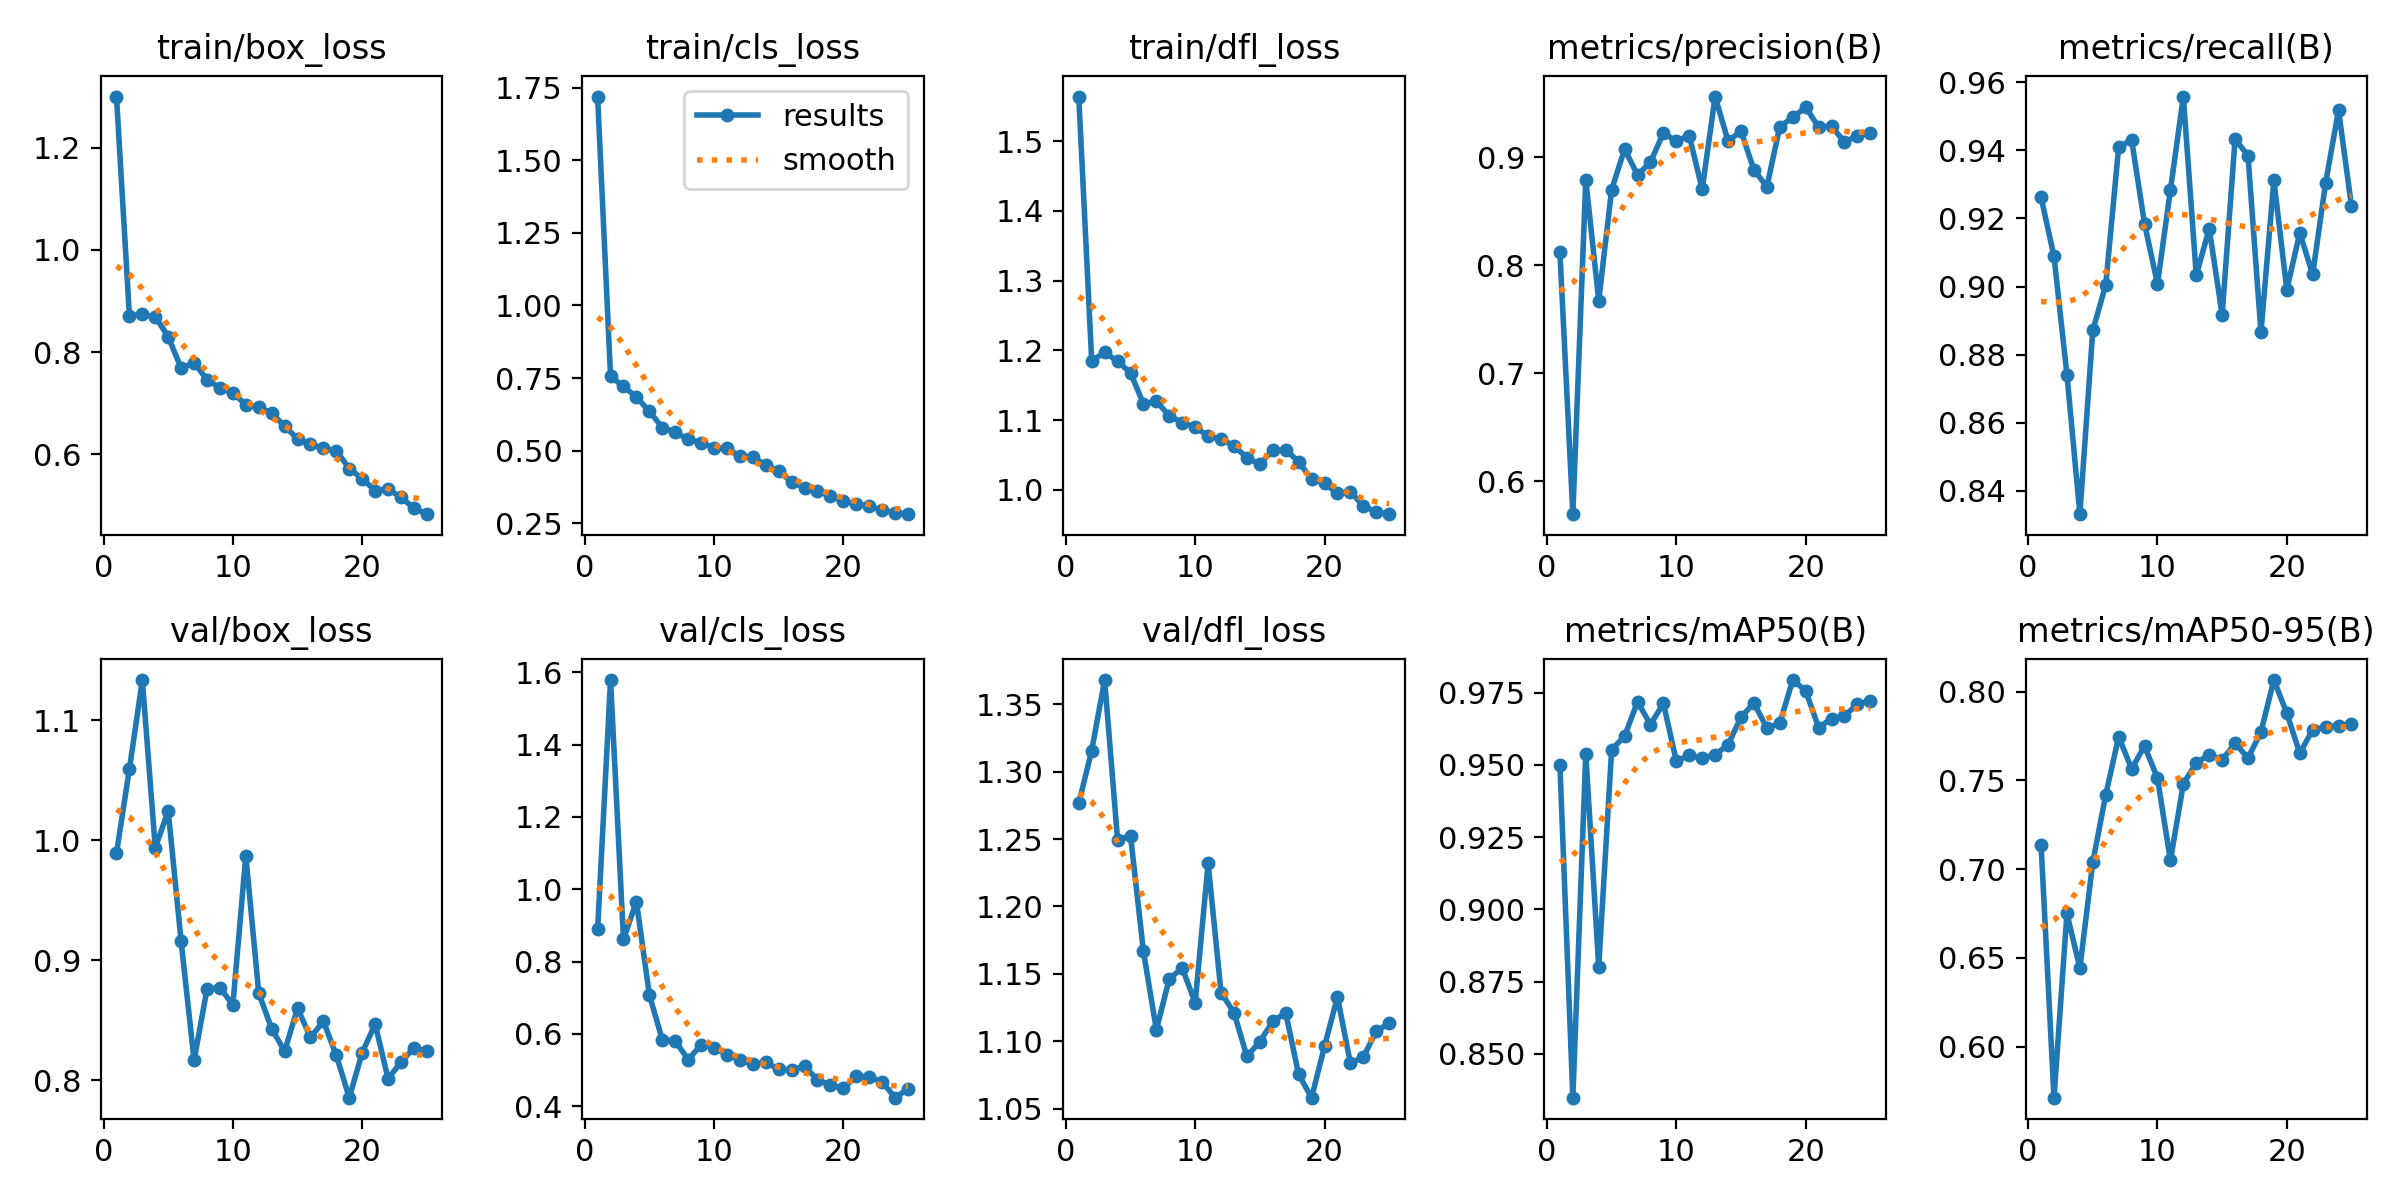

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


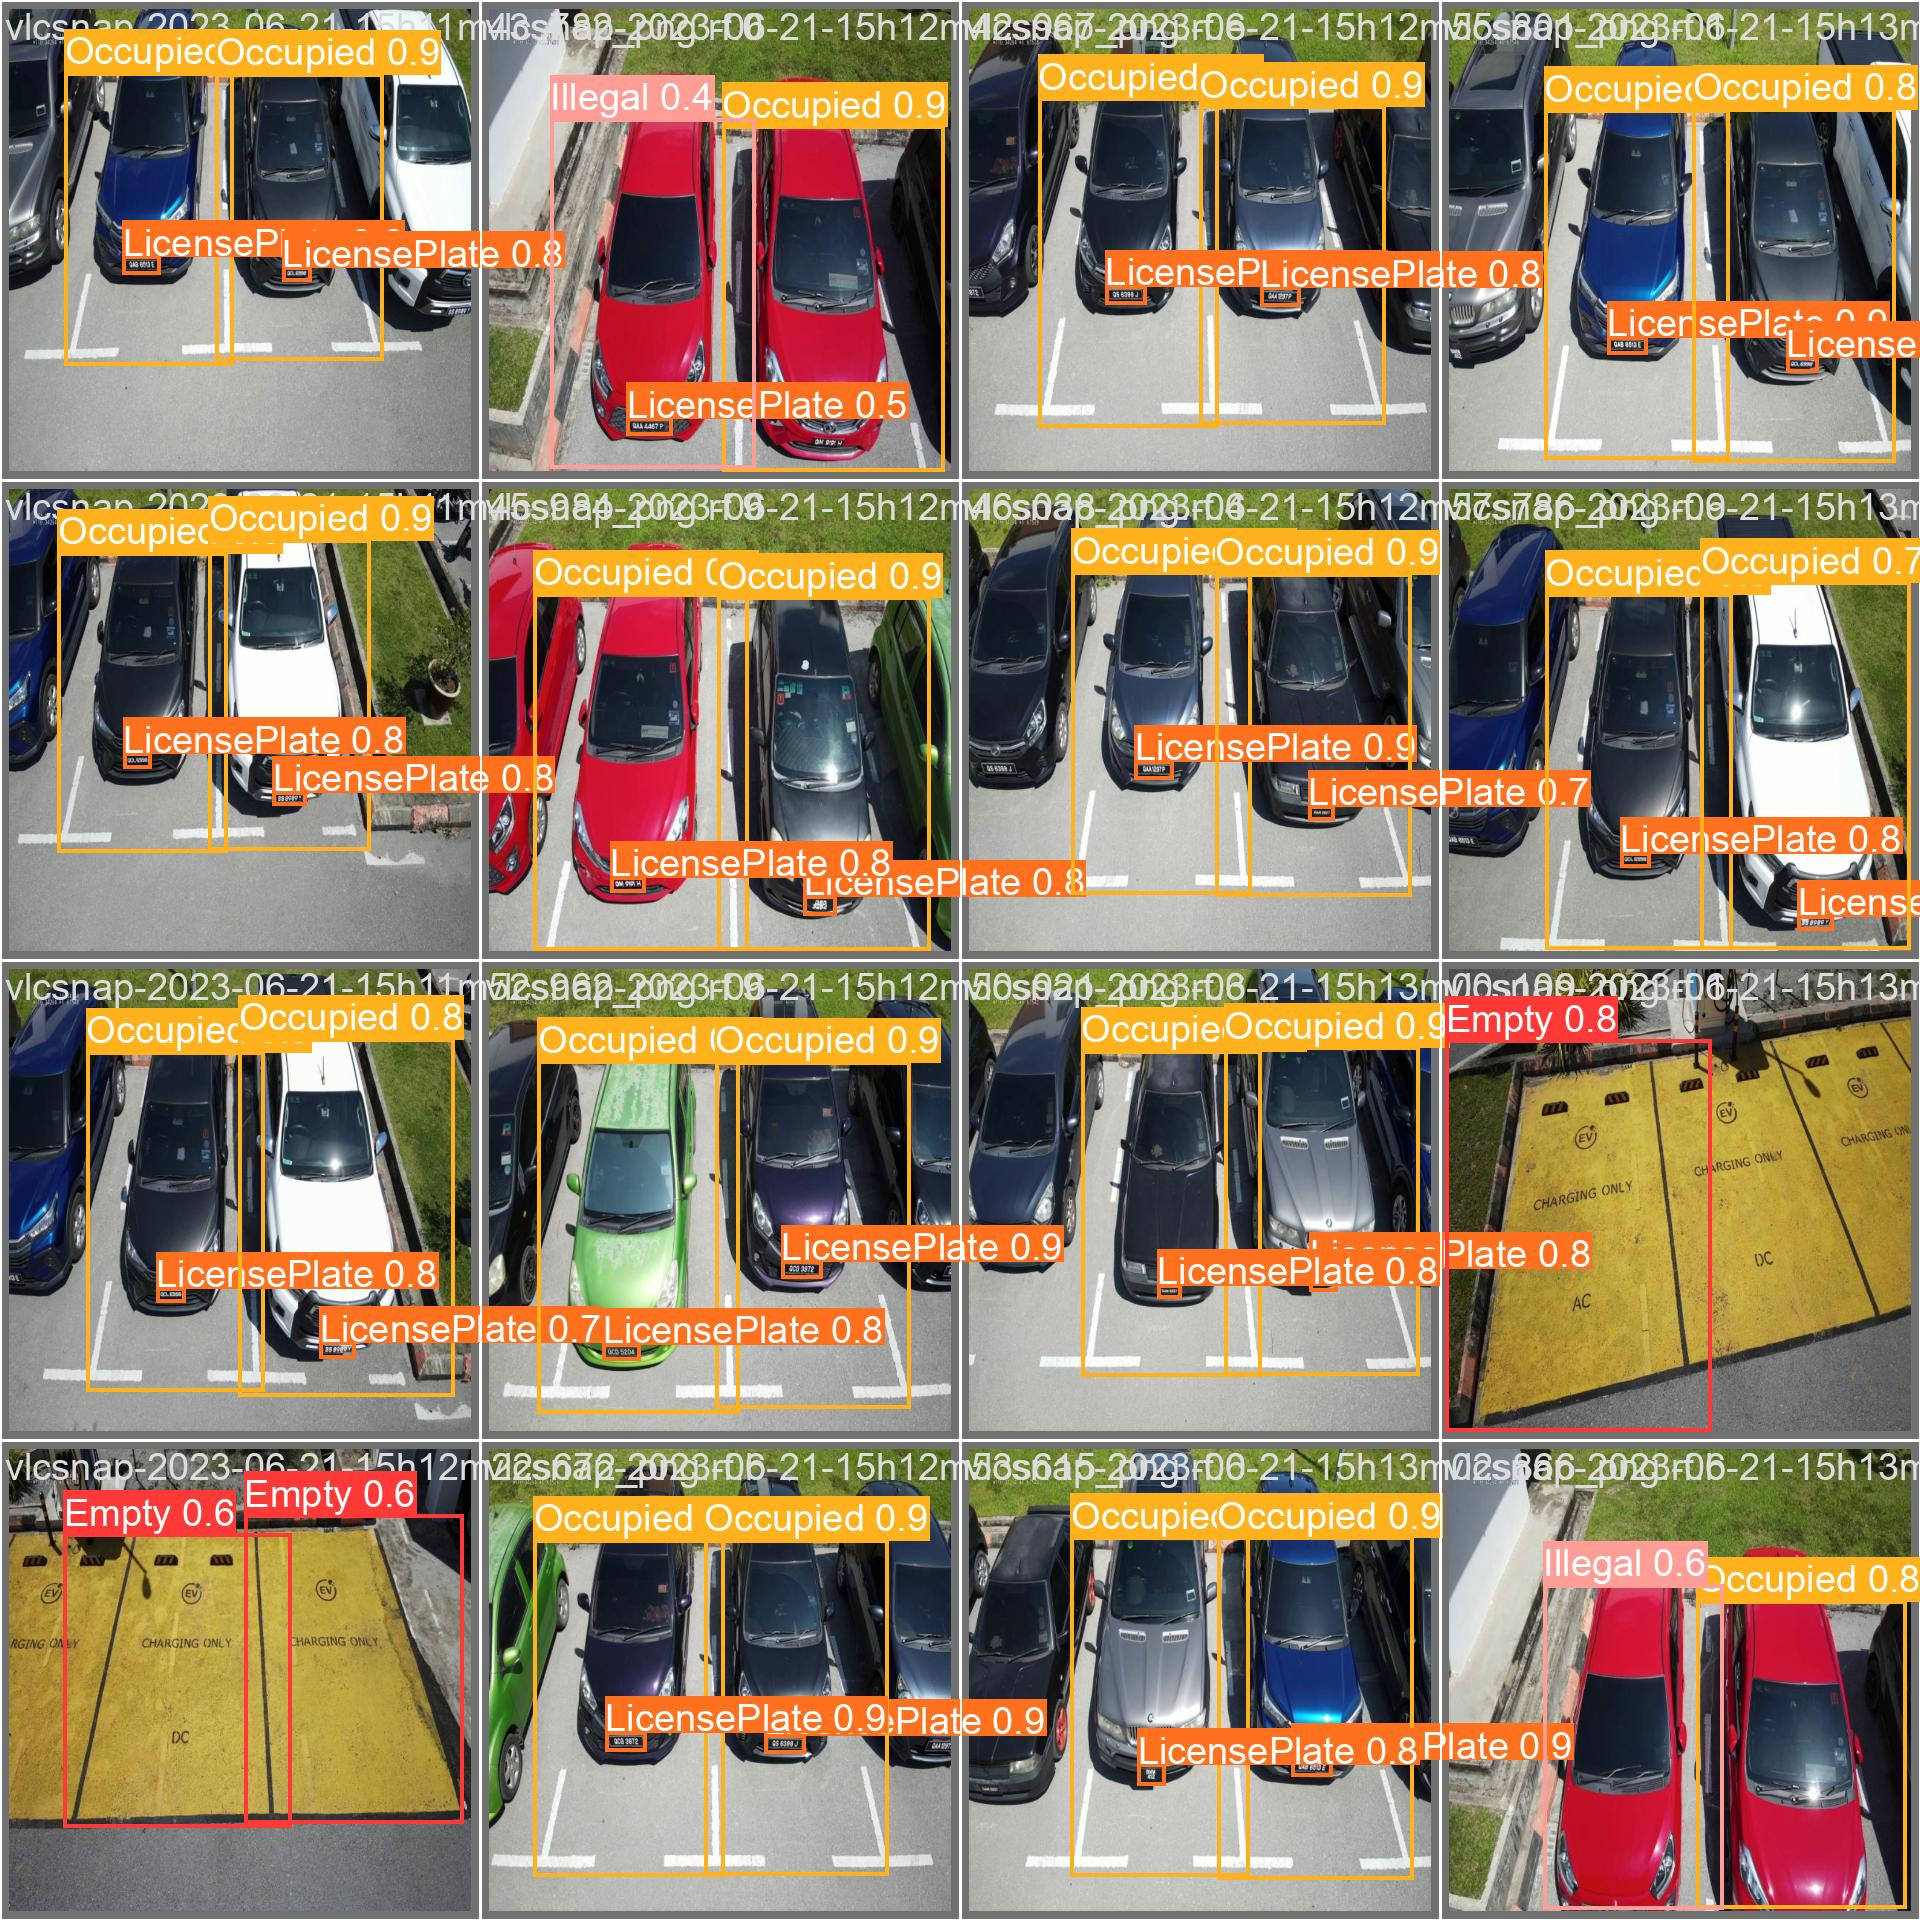

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [11]:
!ls

datasets  runs	yolov8n.pt  yolov8s.pt


In [12]:
%cd {HOME}
best_model = f'{HOME}/runs/detect/train/weights/best.pt'
!yolo task=detect mode=val model={best_model} data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:07<00:00,  1.07s/it]
                   all        104        337      0.937      0.931      0.979      0.807
                 Empty        104         68      0.862       0.92       0.96      0.905
          LicensePlate        104        135      0.958      0.941       0.99      0.607
              Occupied        104        134      0.992      0.933      0.988      0.909
Speed: 10.2ms preprocess, 17.6ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/va

## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={best_model} conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/52 /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h04m47s907_png.rf.8c280e87e1cf7d3b08057f777ce14602.jpg: 800x800 2 Emptys, 22.5ms
image 2/52 /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h05m25s896_png.rf.0c5c3194386d40b5843fa771957dbdf2.jpg: 800x800 2 Emptys, 22.5ms
image 3/52 /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h05m52s330_png.rf.ee50ef5bf41129f9e41ca68dee9e37da.jpg: 800x800 2 Emptys, 22.4ms
image 4/52 /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h06m05s402_png.rf.8c2b8e46de8f6ee752de989498653145.jpg: 800x800 2 Emptys, 22.4ms
image 5/52 

**NOTE:** Let's take a look at few results.

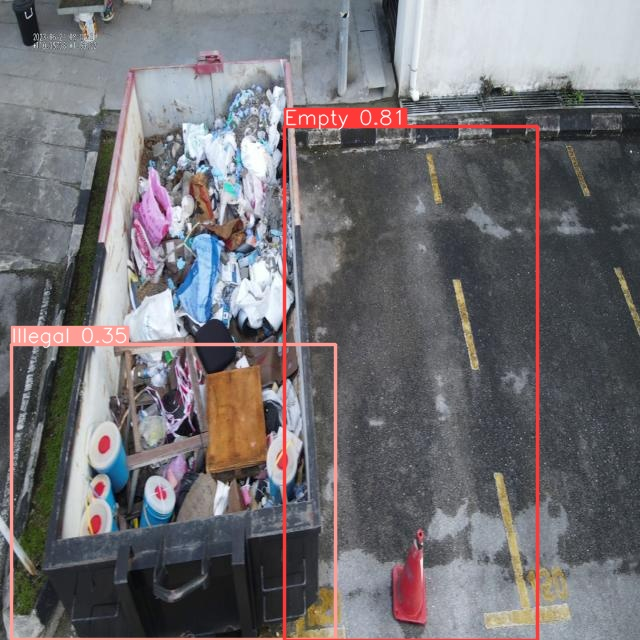

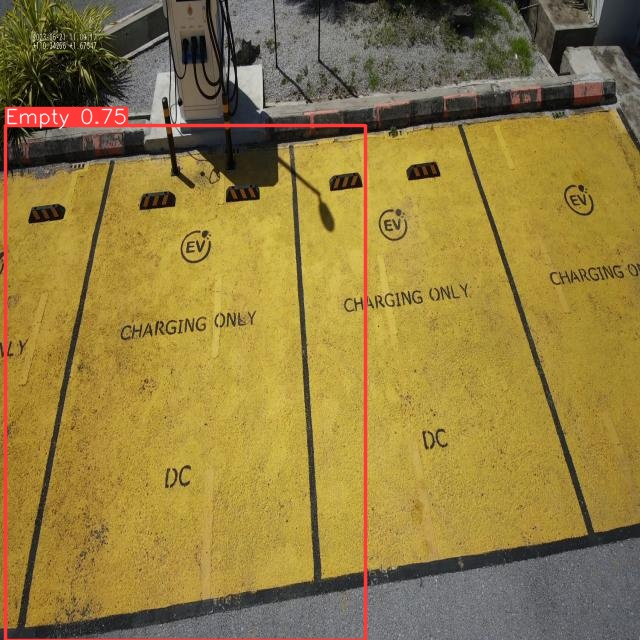

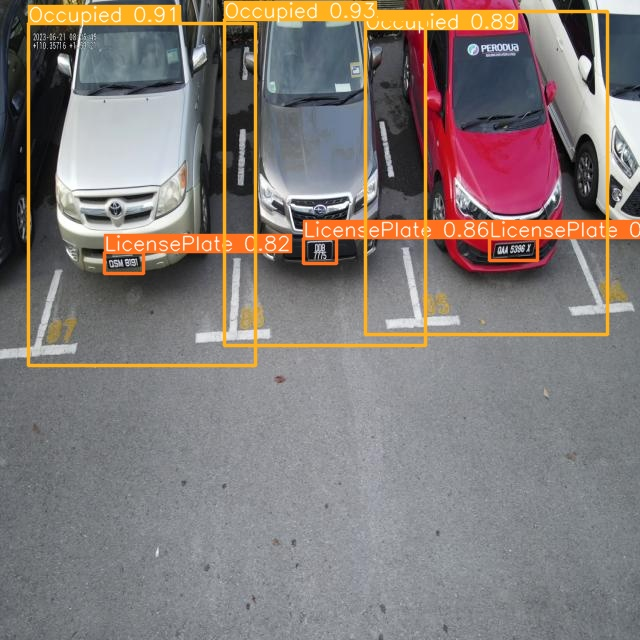

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [15]:
project = rf.workspace("leonardodulcetti").project("deeplearning-kfyfn")
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Let's try to check if the model can detect one of the test data. Also we added a function for reading the Lincense Plate

running inference on vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg
{'predictions': [{'x': 195.0, 'y': 384.5, 'width': 278.0, 'height': 511.0, 'confidence': 0.9120083451271057, 'class': 'Occupied', 'class_id': 3, 'detection_id': '31bda64d-61a8-4566-a9bf-6f0797188cec', 'image_path': '/content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 441.0, 'y': 384.5, 'width': 280.0, 'height': 509.0, 'confidence': 0.9033300876617432, 'class': 'Occupied', 'class_id': 3, 'detection_id': 'ce2fcc57-d272-4b44-a392-c2eb3da974b1', 'image_path': '/content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 431.0, 'y': 574.5, 'width': 56.0, 'height': 23.0, 'confidence': 0.85239052772521

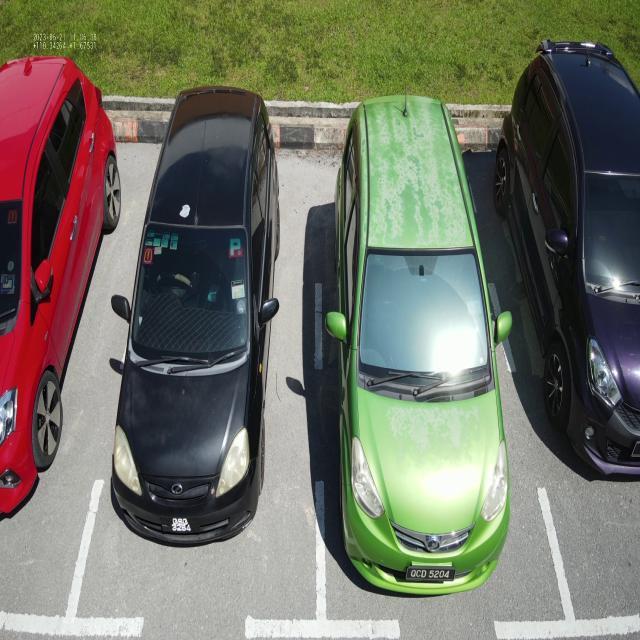

In [20]:
#Run inference on your model on a persistant, auto-scaling, cloud API
import os, random
#load model
best_model = project.version(dataset.version).model
#choose random test set image
test_set_loc = dataset.location + "/test/images/"
# test_image = random.choice(os.listdir(test_set_loc))
test_image = 'vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg'
print("running inference on " + test_image)
pred = best_model.predict(test_set_loc + test_image, confidence=40, overlap=30).json()
print(pred)
image_path = test_set_loc + test_image
Image(filename=image_path, width=600)

In [21]:
model_path = f'{HOME}/runs/detect/train/weights/best.pt'
!yolo task=detect mode=predict model={model_path} conf=0.25 source={image_path} save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg: 800x800 2 LicensePlates, 2 Occupieds, 22.5ms
Speed: 7.8ms preprocess, 22.5ms inference, 546.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


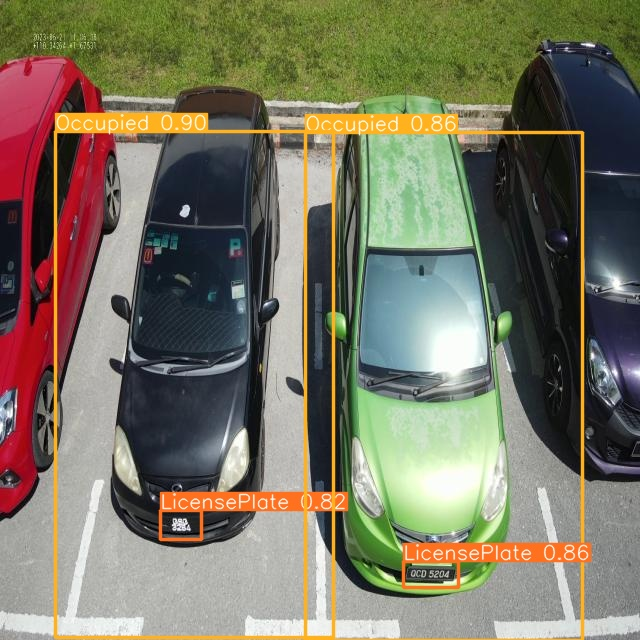

In [22]:
Image(filename=f'/content/runs/detect/predict2/{test_image}', width=700)

License Plate detected in image /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg:
Text: Ocd 5204}, Probability: 0.27409029690572606


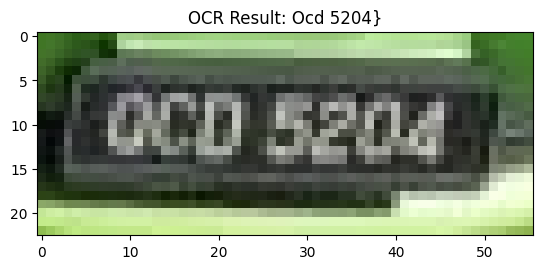

License Plate detected in image /content/datasets/Carpark-and-License-Plate-with-Illegal-parking-1/test/images/vlcsnap-2023-06-21-15h12m48s755_png.rf.2dcc360d17068f0d8a07c4e0273e9f28.jpg:


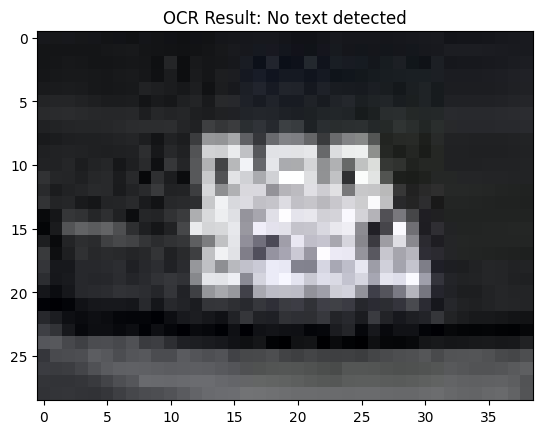

In [25]:
!pip install easyocr -q

import easyocr
import cv2
from matplotlib import pyplot as plt

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])


pred["predictions"][0]
# Process each prediction
for prediction in pred["predictions"]:
    if prediction['class'] == 'LicensePlate':
        # Extract bounding box coordinates
        x, y = prediction['x'], prediction['y']
        width, height = prediction['width'], prediction['height']

        # Read the image
        image_path = prediction['image_path']
        image = cv2.imread(image_path)

        # Crop the image to the bounding box
        x1, y1 = int(x - width / 2), int(y - height / 2)
        x2, y2 = int(x + width / 2), int(y + height / 2)
        cropped_image = image[y1:y2, x1:x2]

        # Perform OCR on the cropped image
        result = reader.readtext(cropped_image)

        # Print the OCR results
        print(f"License Plate detected in image {image_path}:")
        for (bbox, text, prob) in result:
            print(f"Text: {text}, Probability: {prob}")

        # Optional: Display the cropped license plate image with OCR result
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"OCR Result: {result[0][1] if result else 'No text detected'}")
        plt.show()